### Exercise 4.4

Using various $AX=B$ solvers, determine a mapping from the image space to the label space.

By promoting sparsity, determine and rank which pixels in the MNIST set are most informative for correctly labeling the digits. 

Apply your most important pixels to the test data set to see how accurate you are with as few pixels as possible.

Redo the analysis with each digit individually to find the most important pixels for each digit.

Think about the interpretation of what you are doing with $AX=B$ problem. 

In [1]:
import numpy as np
import numpy.linalg as la
from mnist import MNIST
import matplotlib.pyplot as plt

In [2]:
## Creates the image label as per the problem description, a 1x10 column 
def return_labels_mat(lab_vals, num):
    lab = np.zeros([10,num])
    k = 0
    for y in lab_vals:
        lab[y-1][k] = 1
        k = k+1
    return lab

In [3]:
## Converts the original list of reshaped images (28x28 -> 1x784) into a numpy matrix 
def return_image_mat(im_list, num):
    i = im_list[0]
    im = np.zeros([np.size(i), num])
    k = 0
    for i in im_list:
        im[:,k] = i
        k = k+1
    return im

In [4]:
def create_imp_pixels_mat_binary(matx, nn):
    X_sum = np.sum(abs(matx), axis=1)  
    Max_inx = np.argsort(X_sum.flatten())
    Imp_pix = np.squeeze(np.asarray(Max_inx < nn)).astype(int)
    return Imp_pix

In [5]:
mndata = MNIST('..\Data')
mndata.gz = True

In [6]:
exa = [10000, 60000] 

images_train, labels_train = mndata.load_training()
images_test,  labels_test  = mndata.load_testing()

B_train = np.transpose(return_labels_mat(labels_train, exa[1]))
A_train = np.transpose(return_image_mat(images_train, exa[1]))
B_test  = np.transpose(return_labels_mat(labels_test, exa[0]))
A_test  = np.transpose(return_image_mat(images_test, exa[0]))

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
neigh = KNeighborsClassifier(n_neighbors = 10)
neigh.fit(A_train,B_train)

KNeighborsClassifier(n_neighbors=10)

In [9]:
score = neigh.score(A_test, B_test)
print(score)

0.9558


In [10]:
X2n_train = la.pinv(A_train)@B_train
X2n_test = la.pinv(A_test)@B_test
X2n_sp = np.abs(X2n_train) == 0

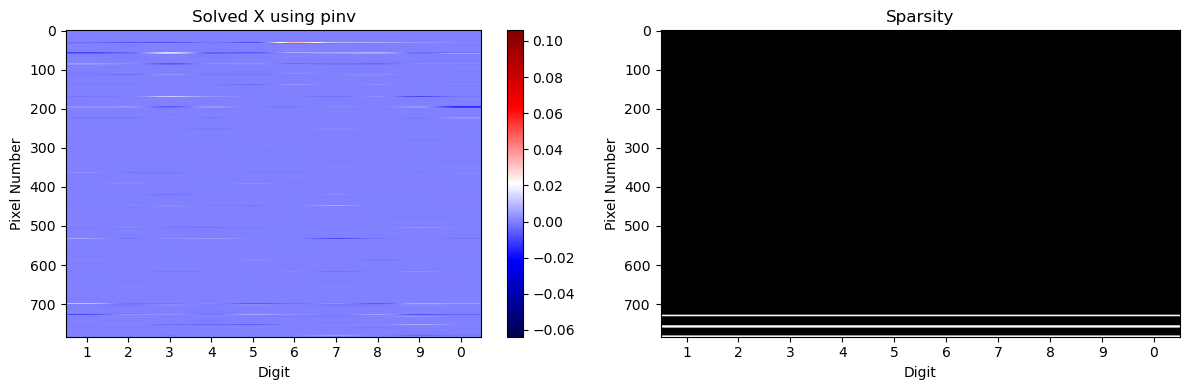

In [11]:
## Plot pixel sparsity 
fig, ax = plt.subplots(1,2, figsize=(12,4))
plt0 = ax[0].imshow(X2n_train, aspect='auto', cmap='seismic')
ax[0].set_xticks(np.arange(0,10))
ax[0].set_xticklabels([1,2,3,4,5,6,7,8,9,0])
ax[0].set_ylabel('Pixel Number')
ax[0].set_xlabel('Digit')
ax[0].set_title('Solved X using pinv') 
fig.colorbar(plt0, ax=ax[0])
plt1 = ax[1].imshow(X2n_sp, aspect='auto', cmap='gray')
ax[1].set_xticks(np.arange(0,10))
ax[1].set_xticklabels([1,2,3,4,5,6,7,8,9,0])
ax[1].set_ylabel('Pixel Number')
ax[1].set_xlabel('Digit')
ax[1].set_title('Sparsity')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.linear_model import Ridge

In [13]:
clf = Ridge(alpha=1.0)
clf.fit(A_train, B_train) 
Xridge = np.transpose(clf.coef_)
Xrid_sp = np.abs(Xridge) == 0

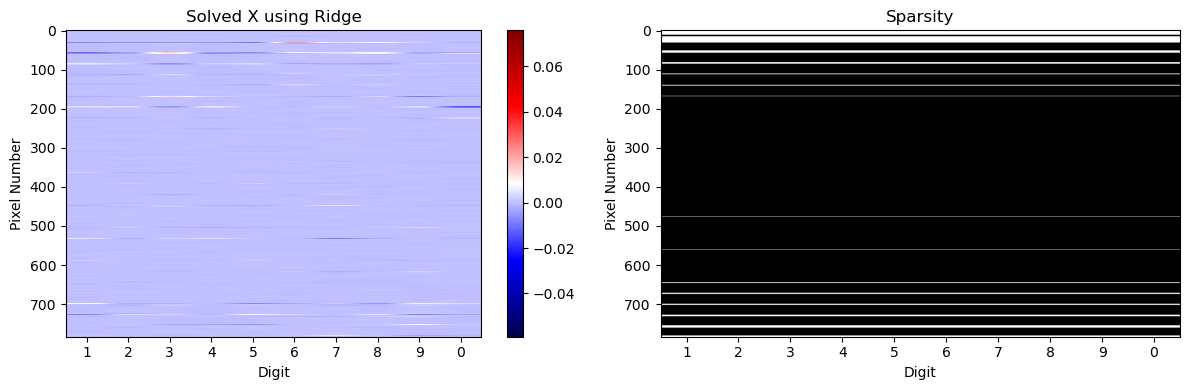

In [14]:
## Plot pixel sparsity
fig, ax = plt.subplots(1,2, figsize=(12,4))
plt0 = ax[0].imshow(Xridge, aspect='auto', cmap='seismic')
ax[0].set_xticks(np.arange(0,10))
ax[0].set_xticklabels([1,2,3,4,5,6,7,8,9,0])
ax[0].set_ylabel('Pixel Number')
ax[0].set_xlabel('Digit')
ax[0].set_title('Solved X using Ridge')
fig.colorbar(plt0, ax=ax[0])
plt1 = ax[1].imshow(Xrid_sp, aspect='auto', cmap='gray')
ax[1].set_xticks(np.arange(0,10))
ax[1].set_xticklabels([1,2,3,4,5,6,7,8,9,0])
ax[1].set_ylabel('Pixel Number')
ax[1].set_xlabel('Digit')
ax[1].set_title('Sparsity')
plt.tight_layout()
plt.show()

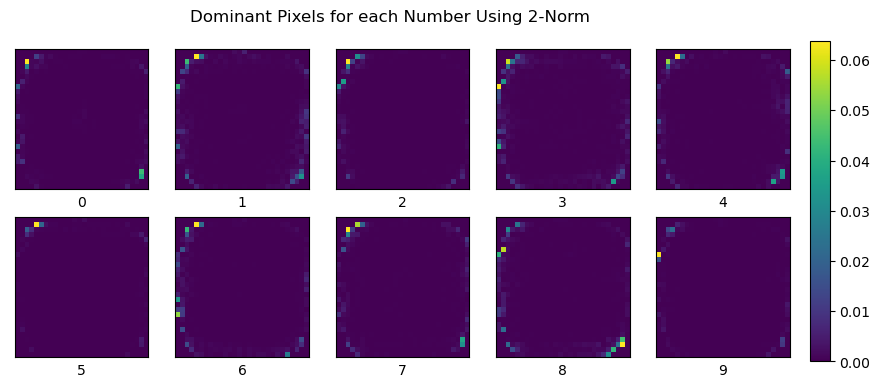

In [15]:
## Plot the dominant pixels found through 2-norm, shows general shape of 
## digits as per decided by 2-norm
fig, ax = plt.subplots(2,5, figsize=(10,4))
i = 0
j = 0
for num in np.arange(0,10):
    im = np.reshape(abs(X2n_train[:,num]), [28,28])
    img = ax[i][j].imshow(im, aspect='auto')
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])
    ax[i][j].set_xlabel(num)
    j = j + 1
    if j == 5:
        i = i + 1
        j = 0
cb_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
cbar = fig.colorbar(img, cax=cb_ax)
plt.suptitle('Dominant Pixels for each Number Using 2-Norm')
plt.show()

In [16]:
from sklearn import linear_model as lm

In [17]:
clf = lm.Lasso(alpha=1.5)
clf.fit(A_train,B_train)

# 1-norm
X1n_train = clf.sparse_coef_
X1n_train = np.transpose(X1n_train.todense())
X1n_sp = np.abs(X1n_train) == 0

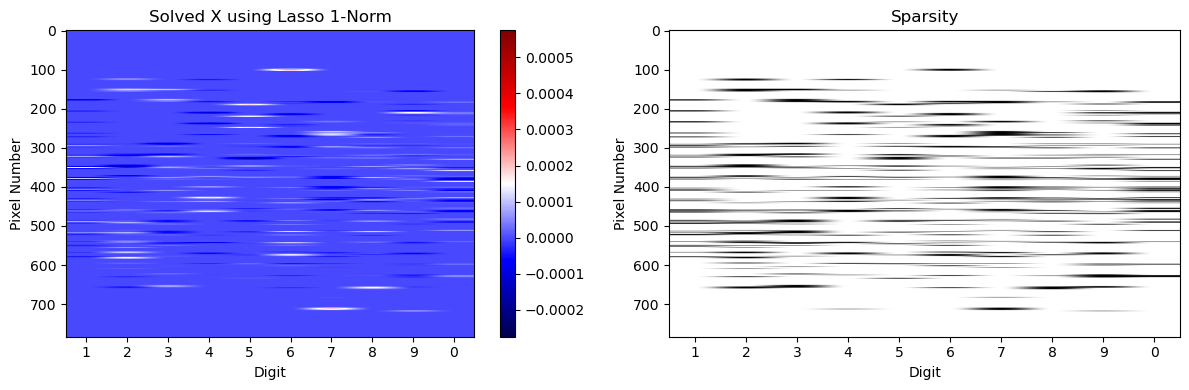

In [18]:
# Plot sparsity
fig, ax = plt.subplots(1,2, figsize=(12,4))
plt0 = ax[0].imshow(X1n_train, aspect='auto', cmap='seismic')
ax[0].set_xticks(np.arange(0,10))
ax[0].set_xticklabels([1,2,3,4,5,6,7,8,9,0])
ax[0].set_ylabel('Pixel Number')
ax[0].set_xlabel('Digit')
ax[0].set_title('Solved X using Lasso 1-Norm')
fig.colorbar(plt0, ax=ax[0])
plt1 = ax[1].imshow(X1n_sp, aspect='auto', cmap='gray')
ax[1].set_xticks(np.arange(0,10))
ax[1].set_xticklabels([1,2,3,4,5,6,7,8,9,0])
ax[1].set_ylabel('Pixel Number')
ax[1].set_xlabel('Digit')
ax[1].set_title('Sparsity')
plt.tight_layout()
plt.show()

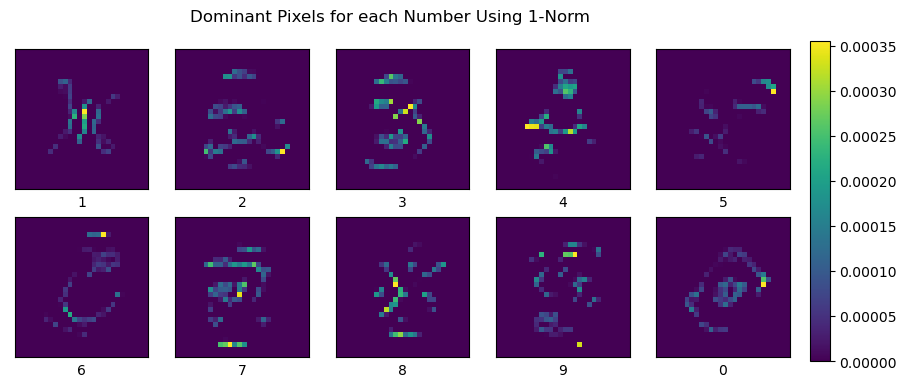

In [19]:
## Plot the dominant pixels found through 1-norm, shows general shape of 
## digits as per decided by 1-norm
fig, ax = plt.subplots(2,5, figsize=(10,4))
i = 0
j = 0
pix_nums = [1,2,3,4,5,6,7,8,9,0]
for num in np.arange(0,10):
    im = np.reshape(abs(X1n_train[:,num]), [28,28])
    img = ax[i][j].imshow(im, aspect='auto')
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])
    ax[i][j].set_xlabel(pix_nums[num])
    j = j + 1
    if j == 5:
        i = i + 1
        j = 0
cb_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
cbar = fig.colorbar(img, cax=cb_ax)
plt.suptitle('Dominant Pixels for each Number Using 1-Norm')
plt.show()

In [20]:
## Apply most 'important' pixels to original image
## Recreate Data based on 'imporant pixels'
pixs = np.arange(50,750, 50)
x_imp = create_imp_pixels_mat_binary(X1n_train, 250)
A_train_imp = x_imp*A_train
A_test_imp = x_imp*A_test

In [21]:
## See how well KNeighbors can classify the images based on only the 'important' pixels
neigh = KNeighborsClassifier(n_neighbors = 10)
neigh.fit(A_train_imp,B_train)
score_imp_pix_only = neigh.score(A_test_imp, B_test)
print(score_imp_pix_only)

0.9078


In [22]:
A_test_ind_pix = np.zeros([exa[0], 784])
for n in np.arange(0,exa[0]):
    label = list(B_test[n][:]).index(1)
    A_test_ind_pix[n][:] = np.multiply(np.transpose(X1n_train[:,label]),A_test[n,:])
    
A_train_ind_pix = np.zeros([exa[1], 784])
for n in np.arange(0,exa[0]):
    label = list(B_test[n][:]).index(1)
    A_train_ind_pix[n][:] = np.multiply(np.transpose(X1n_train[:,label]),A_train[n,:])

In [23]:
## See how well can kneighbors can predict based on the different training sets
neigh = KNeighborsClassifier(n_neighbors = 10)
neigh.fit(A_train_ind_pix,B_train)
score_imp_pix_ind = neigh.score(A_test_ind_pix, B_test)
print(score_imp_pix_ind)

0.7352
